In [204]:
import pandas as pd
import numpy as np
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [24]:
pd.options.display.max_rows = 50

In [163]:

import sqlite3

# crear un dataframe de ejemplo
df = pd.DataFrame({'nombre': ['Juan', 'Ana', 'Pedro', 'Sofía'], 'edad': [25, 30, 40, 35]})

# crear una conexión a la base de datos en memoria
conn = sqlite3.connect(':memory:')

# insertar el dataframe en una tabla llamada 'datos'
df.to_sql('datos', conn, index=False)

# ejecutar una consulta SQL
consulta = "SELECT nombre, edad FROM datos WHERE edad > 30"
resultado = pd.read_sql_query(consulta, conn)

# imprimir el resultado
resultado

,nombre,edad
0,Pedro,40
1,Sofía,35


In [165]:
df = pd.read_csv('data.csv')
df.head()

,Numero_cliente,Fecha_Update,Estatus,Motivo,Tasa_Interes,Importe,Id_product,CAT,TXN,CP,Puntuacion,canal_venta
0,3,"lunes, 11 de noviembre de 2019",NaN,NaN,0,0,8,0,0.0,0,Sin Puntuación,Servicio al cliente
1,12,"lunes, 11 de noviembre de 2019",NaN,NaN,0,0,2,0,0.0,0,Sin Puntuación,Servicio al cliente
2,43,"lunes, 11 de noviembre de 2019",NaN,NaN,0,0,4,0,0.0,0,Sin Puntuación,Servicio al cliente
3,57,"lunes, 11 de noviembre de 2019",NaN,NaN,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente
4,98,"lunes, 11 de noviembre de 2019",NaN,NaN,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12756 entries, 0 to 12755
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Numero_cliente  12756 non-null  int64  
 1   Fecha_Update    12756 non-null  object 
 2   Estatus         7940 non-null   object 
 3   Motivo          2298 non-null   object 
 4   Tasa_Interes    12756 non-null  int64  
 5   Importe         12756 non-null  int64  
 6   Id_product      12756 non-null  int64  
 7   CAT             12756 non-null  int64  
 8   TXN             12756 non-null  float64
 9   CP              12756 non-null  int64  
 10  Puntuacion      12756 non-null  object 
 11  canal_venta     12756 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 1.2+ MB


In [167]:
df.Estatus.value_counts()

RESPONSE     2298
RISK         2298
APPROVED     1505
DELIVERED    1046
REJECTED      793
Name: Estatus, dtype: int64

In [168]:
df.Motivo.value_counts()

PLASTIC    1046
DIGITAL     459
USAGE       234
MOP         232
EMPTY       164
INCOME      163
Name: Motivo, dtype: int64

In [169]:
len(df.Numero_cliente.unique())

3341

In [170]:
len(df.Fecha_Update.unique())

348

In [171]:
df.loc[df.Estatus.notnull(),:]

,Numero_cliente,Fecha_Update,Estatus,Motivo,Tasa_Interes,Importe,Id_product,CAT,TXN,CP,Puntuacion,canal_venta
1043,4,"lunes, 11 de noviembre de 2019",RESPONSE,NaN,0,0,9,0,0.0,0,Sin Puntuación,Operaciones
1044,27,"lunes, 11 de noviembre de 2019",RESPONSE,NaN,0,0,9,0,0.0,0,Sin Puntuación,Operaciones
1045,28,"lunes, 11 de noviembre de 2019",RESPONSE,NaN,0,0,5,0,0.0,0,Sin Puntuación,Operaciones
1046,29,"lunes, 11 de noviembre de 2019",RESPONSE,NaN,0,0,9,0,0.0,0,Sin Puntuación,Operaciones
1047,51,"lunes, 11 de noviembre de 2019",RESPONSE,NaN,0,0,4,0,0.0,0,Sin Puntuación,Operaciones
...,...,...,...,...,...,...,...,...,...,...,...,...
8978,4709,"jueves, 14 de noviembre de 2019",APPROVED,PLASTIC,42,2600,7,48,0.0,0,Sin Puntuación,Servicio al cliente
8979,4809,"jueves, 14 de noviembre de 2019",APPROVED,PLASTIC,34,16900,1,36,0.0,0,Sin Puntuación,Marketing
8980,4836,"jueves, 14 de noviembre de 2019",APPROVED,PLASTIC,32,27800,4,31,0.0,0,Sin Puntuación,Operaciones
8981,4866,"jueves, 14 de noviembre de 2019",APPROVED,PLASTIC,37,7000,8,33,0.0,0,Sin Puntuación,Marketing


In [172]:
## rellenamos la columna estatus cuando sea nulo y TXN se mayor a cero como una transacción.
df.loc[(df.Estatus.isnull())&(df.TXN>0),'Estatus'] = 'TRANSACTION'
df.loc[(df.Estatus.isnull())&(df.TXN==0),'Estatus'] = 'NO_RESPONSE'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12756 entries, 0 to 12755
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Numero_cliente  12756 non-null  int64  
 1   Fecha_Update    12756 non-null  object 
 2   Estatus         12756 non-null  object 
 3   Motivo          2298 non-null   object 
 4   Tasa_Interes    12756 non-null  int64  
 5   Importe         12756 non-null  int64  
 6   Id_product      12756 non-null  int64  
 7   CAT             12756 non-null  int64  
 8   TXN             12756 non-null  float64
 9   CP              12756 non-null  int64  
 10  Puntuacion      12756 non-null  object 
 11  canal_venta     12756 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 1.2+ MB


In [173]:
df.head()

,Numero_cliente,Fecha_Update,Estatus,Motivo,Tasa_Interes,Importe,Id_product,CAT,TXN,CP,Puntuacion,canal_venta
0,3,"lunes, 11 de noviembre de 2019",NO_RESPONSE,NaN,0,0,8,0,0.0,0,Sin Puntuación,Servicio al cliente
1,12,"lunes, 11 de noviembre de 2019",NO_RESPONSE,NaN,0,0,2,0,0.0,0,Sin Puntuación,Servicio al cliente
2,43,"lunes, 11 de noviembre de 2019",NO_RESPONSE,NaN,0,0,4,0,0.0,0,Sin Puntuación,Servicio al cliente
3,57,"lunes, 11 de noviembre de 2019",NO_RESPONSE,NaN,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente
4,98,"lunes, 11 de noviembre de 2019",NO_RESPONSE,NaN,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente


In [174]:
df.Estatus.value_counts()

TRANSACTION    3773
RESPONSE       2298
RISK           2298
APPROVED       1505
DELIVERED      1046
NO_RESPONSE    1043
REJECTED        793
Name: Estatus, dtype: int64

In [175]:
## transformado la fecha_update a formato fecha
meses = {
    'enero': 'January',
    'febrero': 'February',
    'marzo': 'March',
    'abril': 'April',
    'mayo': 'May',
    'junio': 'June',
    'julio': 'July',
    'agosto': 'August',
    'septiembre': 'September',
    'octubre': 'October',
    'noviembre': 'November',
    'diciembre': 'December'
}
df['Fecha_Update'] = df['Fecha_Update'].apply(lambda x :x.split(',')[1].strip())
df['Fecha_Update'] = df['Fecha_Update'].replace(meses, regex=True)
df['Fecha_Update'] = pd.to_datetime(df['Fecha_Update'] , format='%d de %B de %Y')
df['Day'] = df['Fecha_Update'].dt.day_name()
df.head()

,Numero_cliente,Fecha_Update,Estatus,Motivo,Tasa_Interes,Importe,Id_product,CAT,TXN,CP,Puntuacion,canal_venta,Day
0,3,2019-11-11,NO_RESPONSE,NaN,0,0,8,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday
1,12,2019-11-11,NO_RESPONSE,NaN,0,0,2,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday
2,43,2019-11-11,NO_RESPONSE,NaN,0,0,4,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday
3,57,2019-11-11,NO_RESPONSE,NaN,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday
4,98,2019-11-11,NO_RESPONSE,NaN,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12756 entries, 0 to 12755
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Numero_cliente  12756 non-null  int64         
 1   Fecha_Update    12756 non-null  datetime64[ns]
 2   Estatus         12756 non-null  object        
 3   Motivo          2298 non-null   object        
 4   Tasa_Interes    12756 non-null  int64         
 5   Importe         12756 non-null  int64         
 6   Id_product      12756 non-null  int64         
 7   CAT             12756 non-null  int64         
 8   TXN             12756 non-null  float64       
 9   CP              12756 non-null  int64         
 10  Puntuacion      12756 non-null  object        
 11  canal_venta     12756 non-null  object        
 12  Day             12756 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory usage: 1.3+ MB


In [177]:
df.head()

,Numero_cliente,Fecha_Update,Estatus,Motivo,Tasa_Interes,Importe,Id_product,CAT,TXN,CP,Puntuacion,canal_venta,Day
0,3,2019-11-11,NO_RESPONSE,NaN,0,0,8,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday
1,12,2019-11-11,NO_RESPONSE,NaN,0,0,2,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday
2,43,2019-11-11,NO_RESPONSE,NaN,0,0,4,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday
3,57,2019-11-11,NO_RESPONSE,NaN,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday
4,98,2019-11-11,NO_RESPONSE,NaN,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday


In [178]:
### Motivo

In [179]:
df.Motivo.value_counts()

PLASTIC    1046
DIGITAL     459
USAGE       234
MOP         232
EMPTY       164
INCOME      163
Name: Motivo, dtype: int64

In [180]:
df.loc[df.Motivo.isnull(),'Estatus'].value_counts()

TRANSACTION    3773
RESPONSE       2298
RISK           2298
DELIVERED      1046
NO_RESPONSE    1043
Name: Estatus, dtype: int64

In [181]:
df.loc[df.Motivo.notnull(),'Estatus'].value_counts()

APPROVED    1505
REJECTED     793
Name: Estatus, dtype: int64

In [182]:
df.loc[df.Motivo == 'USAGE','Estatus'].value_counts()

REJECTED    234
Name: Estatus, dtype: int64

In [183]:
#### Los valores PLASTIC Y DIGITAL REFIEREN A CUANDO SE APRUEBA LA TARJETA Y USAGE, MOP, EMPTY E INCOME CUANDO SE RECHAZA


In [193]:
df.head()

,Numero_cliente,Fecha_Update,Estatus,Motivo,Tasa_Interes,Importe,Id_product,CAT,TXN,CP,Puntuacion,canal_venta,Day
0,3,2019-11-11,NO_RESPONSE,NaN,0,0,8,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday
1,12,2019-11-11,NO_RESPONSE,NaN,0,0,2,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday
2,43,2019-11-11,NO_RESPONSE,NaN,0,0,4,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday
3,57,2019-11-11,NO_RESPONSE,NaN,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday
4,98,2019-11-11,NO_RESPONSE,NaN,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday


In [199]:
data_grouped_month = df.loc[(df.Estatus== 'APPROVED'),:].groupby(pd.Grouper(key='Fecha_Update', freq='Y')).count().reset_index()
data_grouped_month

,Fecha_Update,Numero_cliente,Estatus,Motivo,Tasa_Interes,Importe,Id_product,CAT,TXN,CP,Puntuacion,canal_venta,Day
0,2019-12-31,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422
1,2020-12-31,78,78,78,78,78,78,78,78,78,78,78,78
2,2021-12-31,4,4,4,4,4,4,4,4,4,4,4,4
3,2022-12-31,1,1,1,1,1,1,1,1,1,1,1,1


In [200]:
data_grouped_month = df.loc[(df.Estatus== 'APPROVED'),:].groupby(pd.Grouper(key='Fecha_Update', freq='M'))['Numero_cliente'].count().reset_index()
data_grouped_month['conteo_acumulativo'] = data_grouped_month['Numero_cliente'].cumsum()
data_grouped_month

,Fecha_Update,Numero_cliente,conteo_acumulativo
0,2019-11-30,1242,1242
1,2019-12-31,180,1422
2,2020-01-31,42,1464
3,2020-02-29,17,1481
4,2020-03-31,8,1489
5,2020-04-30,5,1494
6,2020-05-31,0,1494
7,2020-06-30,1,1495
8,2020-07-31,2,1497
9,2020-08-31,1,1498


In [207]:
df.loc[(df.Estatus== 'APPROVED'),'Motivo'].value_counts()

PLASTIC    1046
DIGITAL     459
Name: Motivo, dtype: int64

In [198]:
df.to_csv('prueba.csv')

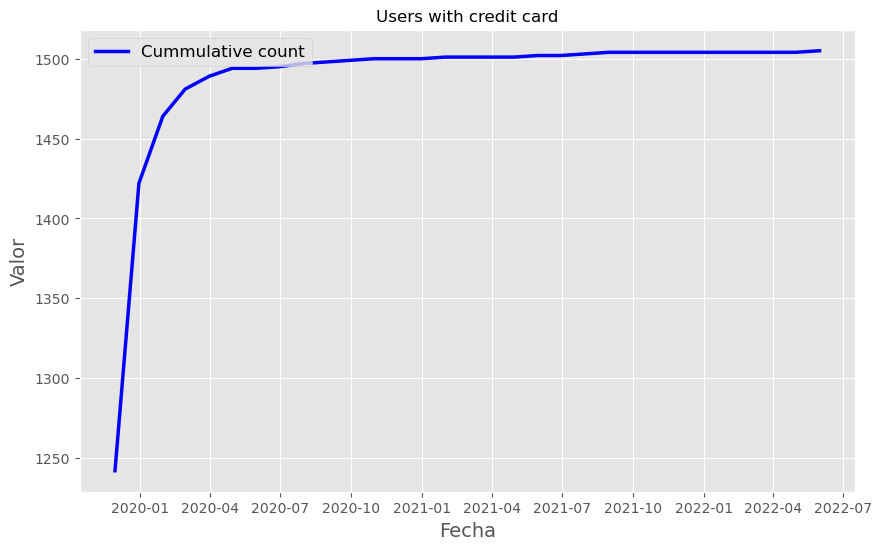

In [220]:
#sns.lineplot(x='Fecha_Update', y='conteo_acumulativo', data=data_grouped_month)
# Establecer el tamaño de la figura
fig,ax = plt.subplots(figsize=(10, 6))
#plt.figure(figsize=(10, 6))

# Crear el gráfico utilizando lineplot
sns.lineplot(x='Fecha_Update', y='conteo_acumulativo', data=data_grouped_month, linewidth=2.5, color='blue')

# Establecer el título del gráfico y etiquetas de los ejes
plt.title('Users with credit card', fontsize=12)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Valor', fontsize=14)

# Personalizar la leyenda
plt.legend(['Cummulative count'], loc='upper left', fontsize=12)

# Mostrar el gráfico
plt.show()

In [210]:
data_grouped_motivo = df.loc[(df.Estatus== 'APPROVED'),:].groupby('Motivo')['Numero_cliente'].count().reset_index()
data_grouped_motivo

,Motivo,Numero_cliente
0,DIGITAL,459
1,PLASTIC,1046


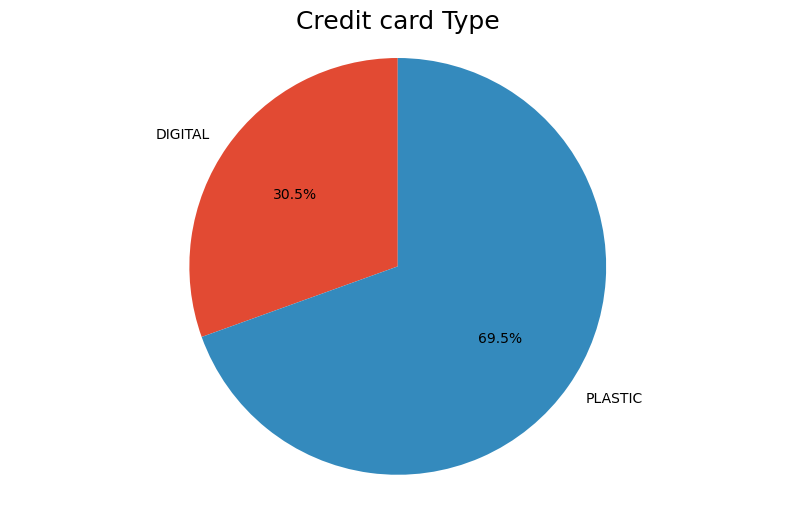

In [217]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(data_grouped_motivo['Numero_cliente'], labels=data_grouped_motivo['Motivo'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Credit card Type', fontsize=18)

# Mostrar la gráfica
plt.show()

In [219]:
##df.to_csv('data_1.csv', index = False)

In [221]:
df.canal_venta.value_counts()

Servicio al cliente    4252
Operaciones            4252
Marketing              4252
Name: canal_venta, dtype: int64

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12756 entries, 0 to 12755
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Numero_cliente  12756 non-null  int64         
 1   Fecha_Update    12756 non-null  datetime64[ns]
 2   Estatus         12756 non-null  object        
 3   Motivo          2298 non-null   object        
 4   Tasa_Interes    12756 non-null  int64         
 5   Importe         12756 non-null  int64         
 6   Id_product      12756 non-null  int64         
 7   CAT             12756 non-null  int64         
 8   TXN             12756 non-null  float64       
 9   CP              12756 non-null  int64         
 10  Puntuacion      12756 non-null  object        
 11  canal_venta     12756 non-null  object        
 12  Day             12756 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory usage: 1.3+ MB


In [227]:
df_clientes = pd.DataFrame(pd.pivot_table(df, values = 'Id_product',index='Numero_cliente', columns='Estatus', aggfunc='count', fill_value=0))
df_clientes.reset_index(inplace = True)
df_clientes.head(10)

Estatus,Numero_cliente,APPROVED,DELIVERED,NO_RESPONSE,REJECTED,RESPONSE,RISK,TRANSACTION
0,1,1,0,0,0,1,1,1
1,2,0,0,1,0,0,0,0
2,3,0,0,1,0,0,0,0
3,4,1,1,0,0,1,1,4
4,5,1,1,0,0,1,1,0
5,7,0,0,0,1,1,1,0
6,8,1,1,0,0,1,1,0
7,10,0,0,1,0,0,0,0
8,11,1,1,0,0,1,1,5
9,12,0,0,1,0,0,0,0


In [228]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Numero_cliente  3341 non-null   int64
 1   APPROVED        3341 non-null   int64
 2   DELIVERED       3341 non-null   int64
 3   NO_RESPONSE     3341 non-null   int64
 4   REJECTED        3341 non-null   int64
 5   RESPONSE        3341 non-null   int64
 6   RISK            3341 non-null   int64
 7   TRANSACTION     3341 non-null   int64
dtypes: int64(8)
memory usage: 208.9 KB


In [230]:
df_clientes.loc[df_clientes.APPROVED >0,:]

Estatus,Numero_cliente,APPROVED,DELIVERED,NO_RESPONSE,REJECTED,RESPONSE,RISK,TRANSACTION
0,1,1,0,0,0,1,1,1
3,4,1,1,0,0,1,1,4
4,5,1,1,0,0,1,1,0
6,8,1,1,0,0,1,1,0
8,11,1,1,0,0,1,1,5
...,...,...,...,...,...,...,...,...
3318,4966,1,1,0,0,1,1,5
3321,4970,1,0,0,0,1,1,5
3334,4991,1,1,0,0,1,1,5
3339,4998,1,0,0,0,1,1,4


In [236]:
df_customers_reponse = pd.DataFrame(pd.pivot_table(df.loc[df.Estatus.isin(['RESPONSE','NO_RESPONSE'])], values = 'Id_product',index='Estatus', columns='canal_venta', aggfunc='count', margins = True))
df_customers_reponse.reset_index(inplace = True)
df_customers_reponse.head(10)

canal_venta,Estatus,Marketing,Operaciones,Servicio al cliente,All
0,NO_RESPONSE,334,350,359,1043
1,RESPONSE,759,788,751,2298
2,All,1093,1138,1110,3341


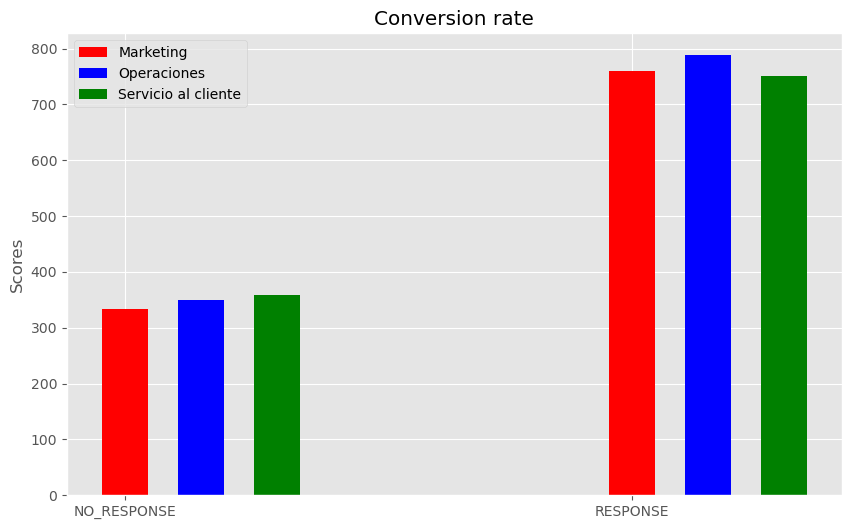

In [260]:
ind = np.arange(2)
width = 0.09
fig = plt.figure(figsize=(10,6)); ax = plt.axes()
ax.bar(ind+ 0.00, df_customers_reponse.Marketing[0:2].values, width, color='r') # barra roja. 
ax.bar(ind+ 0.15, df_customers_reponse.Operaciones[0:2].values, width, color='b') # barra azul 
ax.bar(ind+ 0.30, df_customers_reponse['Servicio al cliente'][0:2].values, width, color='g') # barra azul 
ax.set_ylabel('Scores'); 
ax.set_title('Conversion rate')
ax.set_xticks(ind)
ax.set_xticklabels(['NO_RESPONSE', 'RESPONSE'])
ax.legend(labels=['Marketing', 'Operaciones', 'Servicio al cliente'])
plt.show()

In [286]:
rate_conv = '{:.2f}%'.format(100*np.round(df.loc[df.Estatus.isin(['APPROVED']),'Numero_cliente'].count()/df.loc[df.Estatus.isin(['RESPONSE']),'Numero_cliente'].count(),4))
#rate_conv =  '{:.2f}%'.format(rate_conv)  

In [287]:
rate_conv

'65.49%'

In [285]:
df.loc[df.Estatus.isin(['APPROVED']),'Numero_cliente'].count()

1505

In [291]:
len(df.loc[df.Estatus.isin(['TRANSACTION']),'Numero_cliente'].unique())

1255

-------------

## Customer behavior

In [293]:
df.head()

,Numero_cliente,Fecha_Update,Estatus,Motivo,Tasa_Interes,Importe,Id_product,CAT,TXN,CP,Puntuacion,canal_venta,Day
0,3,2019-11-11,NO_RESPONSE,NaN,0,0,8,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday
1,12,2019-11-11,NO_RESPONSE,NaN,0,0,2,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday
2,43,2019-11-11,NO_RESPONSE,NaN,0,0,4,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday
3,57,2019-11-11,NO_RESPONSE,NaN,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday
4,98,2019-11-11,NO_RESPONSE,NaN,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday


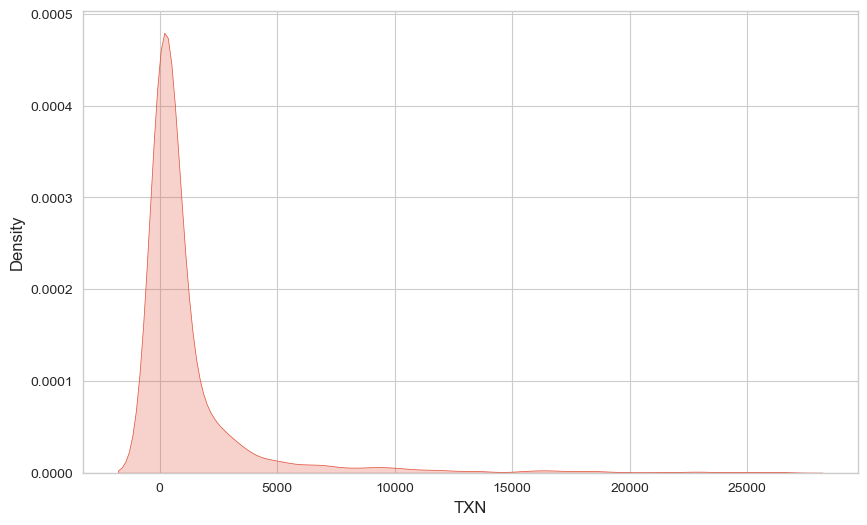

In [309]:
fig = plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.kdeplot(data=df.loc[(df.Estatus== 'TRANSACTION')&(df.TXN<27000),:], x='TXN', shade=True)
plt.show()

In [306]:
df.loc[(df.Estatus== 'TRANSACTION')&(df.TXN<27000),'TXN'].describe()

count     3733.000000
mean      1306.772828
std       3046.429665
min          0.342075
25%         66.426243
50%        257.678973
75%       1009.401063
max      26441.910770
Name: TXN, dtype: float64

In [307]:
df.loc[(df.Estatus== 'TRANSACTION'),:].count()
#data_grouped_month['conteo_acumulativo'] = data_grouped_month['Numero_cliente'].cumsum()


Numero_cliente    3773
Fecha_Update      3773
Estatus           3773
Motivo               0
Tasa_Interes      3773
Importe           3773
Id_product        3773
CAT               3773
TXN               3773
CP                3773
Puntuacion        3773
canal_venta       3773
Day               3773
dtype: int64

In [304]:
np.percentile(df.loc[(df.Estatus== 'TRANSACTION'),'TXN'], 99)

27824.84923239993

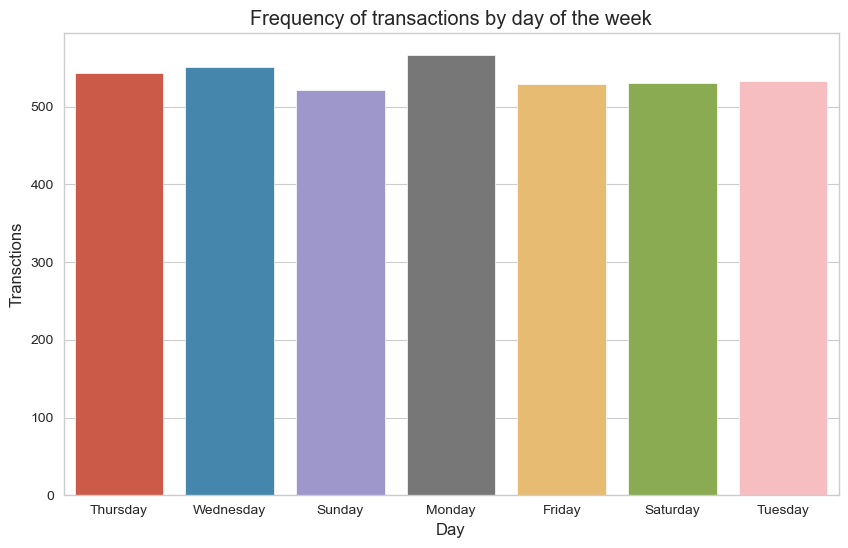

In [315]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='Day', data=df.loc[(df.Estatus== 'TRANSACTION'),:])
ax.set_ylabel('Transctions')
ax.set_title('Frequency of transactions by day of the week')

# Mostrar gráfico
plt.show()

In [342]:
df_clientes_b0 = pd.DataFrame(pd.pivot_table(df.loc[(df.Estatus== 'TRANSACTION')], values = ['TXN','Id_product'],index='Numero_cliente', aggfunc={'TXN':np.mean, 'Id_product':'count'}))
df_clientes_b0.reset_index(inplace = True)
df_clientes_b0.head(10)

,Numero_cliente,Id_product,TXN
0,1,1,434.112066
1,4,4,1356.552946
2,11,5,1250.398294
3,17,2,76.019949
4,18,1,1131.122678
5,20,2,140.097380
6,28,2,198.165967
7,31,2,135.285738
8,33,1,189.502785
9,35,5,367.835713


In [331]:
df_clientes_b1 = pd.DataFrame(pd.pivot_table(df.loc[(df.Estatus== 'APPROVED')], values = ['Importe','Tasa_Interes','CAT'],index='Numero_cliente', aggfunc={'Importe':np.max, 'Tasa_Interes':np.max, 'CAT':np.max}))
df_clientes_b1.reset_index(inplace = True)
df_clientes_b1.head(10)

,Numero_cliente,CAT,Importe,Tasa_Interes
0,1,49,1300,40
1,4,39,10000,32
2,5,48,15900,46
3,8,42,3300,40
4,11,32,49800,32
5,14,46,2700,31
6,16,44,10700,38
7,17,48,6600,48
8,18,48,16300,36
9,19,35,21200,38


In [333]:
df.head()

,Numero_cliente,Fecha_Update,Estatus,Motivo,Tasa_Interes,Importe,Id_product,CAT,TXN,CP,Puntuacion,canal_venta,Day
0,3,2019-11-11,NO_RESPONSE,NaN,0,0,8,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday
1,12,2019-11-11,NO_RESPONSE,NaN,0,0,2,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday
2,43,2019-11-11,NO_RESPONSE,NaN,0,0,4,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday
3,57,2019-11-11,NO_RESPONSE,NaN,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday
4,98,2019-11-11,NO_RESPONSE,NaN,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente,Monday


In [337]:
df_clientes_b2 = pd.DataFrame(pd.pivot_table(df.loc[(df.Estatus== 'DELIVERED')], values = ['CP', 'Puntuacion'],index='Numero_cliente', aggfunc={'CP':np.max, 'Puntuacion':np.max}))
df_clientes_b2.reset_index(inplace = True)
df_clientes_b2.head(10)

,Numero_cliente,CP,Puntuacion
0,4,11560,3
1,5,53100,0
2,8,11560,2
3,11,64000,0
4,14,11560,4
5,16,11560,2
6,17,44620,3
7,18,53100,2
8,19,11560,0
9,20,44100,2


In [345]:
df_clientes_b3 = df.loc[(df.Estatus== 'APPROVED'),['Numero_cliente' ,'Motivo']]
df_clientes_b3.head()

,Numero_cliente,Motivo
7478,75,DIGITAL
7479,284,PLASTIC
7480,437,DIGITAL
7481,705,PLASTIC
7482,811,PLASTIC


In [354]:
df_merged = pd.merge(df_clientes_b1, df_clientes_b0, on='Numero_cliente', how='left')
df_merged_2 = pd.merge(df_clientes_b3, df_clientes_b2, on='Numero_cliente', how='left')
df_clientes = pd.merge(df_merged, df_merged_2, on='Numero_cliente', how='left')
df_clientes.head()

,Numero_cliente,CAT,Importe,Tasa_Interes,Id_product,TXN,Motivo,CP,Puntuacion
0,1,49,1300,40,1.0,434.112066,DIGITAL,NaN,NaN
1,4,39,10000,32,4.0,1356.552946,PLASTIC,11560.0,3
2,5,48,15900,46,NaN,NaN,PLASTIC,53100.0,0
3,8,42,3300,40,NaN,NaN,PLASTIC,11560.0,2
4,11,32,49800,32,5.0,1250.398294,PLASTIC,64000.0,0


In [355]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1505 entries, 0 to 1504
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Numero_cliente  1505 non-null   int64  
 1   CAT             1505 non-null   int64  
 2   Importe         1505 non-null   int64  
 3   Tasa_Interes    1505 non-null   int64  
 4   Id_product      1255 non-null   float64
 5   TXN             1255 non-null   float64
 6   Motivo          1505 non-null   object 
 7   CP              1046 non-null   float64
 8   Puntuacion      1046 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 117.6+ KB


In [353]:
df_clientes_b3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1505 entries, 7478 to 8982
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Numero_cliente  1505 non-null   int64 
 1   Motivo          1505 non-null   object
dtypes: int64(1), object(1)
memory usage: 35.3+ KB


In [368]:
def create_clients_table(data):
	df_clientes_b0 = pd.DataFrame(pd.pivot_table(data.loc[(data.Estatus== 'TRANSACTION')], values = ['TXN','Id_product'],index='Numero_cliente', aggfunc={'TXN':np.mean, 'Id_product':'count'}))
	df_clientes_b0.reset_index(inplace = True)
	df_clientes_b1 = pd.DataFrame(pd.pivot_table(data.loc[(data.Estatus== 'APPROVED')], values = ['Importe','Tasa_Interes','CAT'],index='Numero_cliente', aggfunc={'Importe':np.max, 'Tasa_Interes':np.max, 'CAT':np.max}))
	df_clientes_b1.reset_index(inplace = True)
	df_clientes_b2 = pd.DataFrame(pd.pivot_table(data.loc[(data.Estatus== 'DELIVERED')], values = ['CP', 'Puntuacion'],index='Numero_cliente', aggfunc={'CP':np.max, 'Puntuacion':np.max}))
	df_clientes_b2.reset_index(inplace = True)
	df_clientes_b3 = data.loc[(data.Estatus== 'APPROVED'),['Numero_cliente' ,'Motivo']]
	df_merged = pd.merge(df_clientes_b1, df_clientes_b0, on='Numero_cliente', how='left')
	df_merged_2 = pd.merge(df_clientes_b3, df_clientes_b2, on='Numero_cliente', how='left')
	df_clients = pd.merge(df_merged, df_merged_2, on='Numero_cliente', how='left')
	df_clients.rename(columns = {'Numero_cliente':'CUSTOMER_ID', 'Importe':'AMOUNT_CREDIT_GRANTED', 'Id_product': 'TRANSACTIONS', 'TXN':'MEAN_AMOUNT_TRANSACTION', 'Puntuacion':'DELIVERY_SCORE','Motivo':'CARD_TYPE'}, inplace = True)
	return df_clients 

In [369]:
clients = create_clients_table(df)

In [370]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1505 entries, 0 to 1504
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUSTOMER_ID              1505 non-null   int64  
 1   CAT                      1505 non-null   int64  
 2   AMOUNT_CREDIT_GRANTED    1505 non-null   int64  
 3   Tasa_Interes             1505 non-null   int64  
 4   TRANSACTIONS             1255 non-null   float64
 5   MEAN_AMOUNT_TRANSACTION  1255 non-null   float64
 6   CARD_TYPE                1505 non-null   object 
 7   CP                       1046 non-null   float64
 8   DELIVERY_SCORE           1046 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 117.6+ KB


In [371]:
clients.head()

,CUSTOMER_ID,CAT,AMOUNT_CREDIT_GRANTED,Tasa_Interes,TRANSACTIONS,MEAN_AMOUNT_TRANSACTION,CARD_TYPE,CP,DELIVERY_SCORE
0,1,49,1300,40,1.0,434.112066,DIGITAL,NaN,NaN
1,4,39,10000,32,4.0,1356.552946,PLASTIC,11560.0,3
2,5,48,15900,46,NaN,NaN,PLASTIC,53100.0,0
3,8,42,3300,40,NaN,NaN,PLASTIC,11560.0,2
4,11,32,49800,32,5.0,1250.398294,PLASTIC,64000.0,0


In [377]:
clients.DELIVERY_SCORE = clients.DELIVERY_SCORE.astype(float)

In [378]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1505 entries, 0 to 1504
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUSTOMER_ID              1505 non-null   int64  
 1   CAT                      1505 non-null   int64  
 2   AMOUNT_CREDIT_GRANTED    1505 non-null   int64  
 3   Tasa_Interes             1505 non-null   int64  
 4   TRANSACTIONS             1255 non-null   float64
 5   MEAN_AMOUNT_TRANSACTION  1255 non-null   float64
 6   CARD_TYPE                1505 non-null   object 
 7   CP                       1046 non-null   float64
 8   DELIVERY_SCORE           1046 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 117.6+ KB


In [379]:
clients.head()

,CUSTOMER_ID,CAT,AMOUNT_CREDIT_GRANTED,Tasa_Interes,TRANSACTIONS,MEAN_AMOUNT_TRANSACTION,CARD_TYPE,CP,DELIVERY_SCORE
0,1,49,1300,40,1.0,434.112066,DIGITAL,NaN,NaN
1,4,39,10000,32,4.0,1356.552946,PLASTIC,11560.0,3.0
2,5,48,15900,46,NaN,NaN,PLASTIC,53100.0,0.0
3,8,42,3300,40,NaN,NaN,PLASTIC,11560.0,2.0
4,11,32,49800,32,5.0,1250.398294,PLASTIC,64000.0,0.0


In [380]:
def metrics_clients(data):
    mean_transactions = np.round(data.TRANSACTIONS.mean(),2)
    mean_transactions_amount = np.round(data.MEAN_AMOUNT_TRANSACTION.mean(),2)
    mean_delivery_score = np.round(data.DELIVERY_SCORE.mean(),2)
    mean_amount_g = np.round(data.AMOUNT_CREDIT_GRANTED.mean(),2)
    metrics = pd.DataFrame({'METRIC': ['MEAN_TRANSACTIONS', 'MEAN_TRANSACTIONS_AMOUNT', 'MEAN_DELIVERY_SCORE', 'MEAN_AMOUNT_CREDIT_GRANTED'], 
                  'VALUE': [mean_transactions, mean_transactions_amount, mean_delivery_score, mean_amount_g]})
    return metrics

In [381]:
pl = metrics_clients(clients)
pl

,METRIC,VALUE
0,MEAN_TRANSACTIONS,3.01
1,MEAN_TRANSACTIONS_AMOUNT,2072.15
2,MEAN_DELIVERY_SCORE,1.96
3,MEAN_AMOUNT_CREDIT_GRANTED,14479.80


In [382]:
clients.DELIVERY_SCORE.describe()

count    1046.000000
mean        1.964627
std         1.116938
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: DELIVERY_SCORE, dtype: float64

In [74]:
df_clientes = pd.DataFrame(pd.pivot_table(df, values = 'Id_product',index='Numero_cliente', columns='Estatus', aggfunc='count'))
df_clientes.reset_index(inplace = True)
df_clientes.head(10)

Estatus,Numero_cliente,APPROVED,DELIVERED,NO_RESPONSE,REJECTED,RESPONSE,RISK,TRANSACTION
0,1,1.0,NaN,NaN,NaN,1.0,1.0,1.0
1,2,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,3,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,4,1.0,1.0,NaN,NaN,1.0,1.0,4.0
4,5,1.0,1.0,NaN,NaN,1.0,1.0,NaN
5,7,NaN,NaN,NaN,1.0,1.0,1.0,NaN
6,8,1.0,1.0,NaN,NaN,1.0,1.0,NaN
7,10,NaN,NaN,1.0,NaN,NaN,NaN,NaN
8,11,1.0,1.0,NaN,NaN,1.0,1.0,5.0
9,12,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [77]:
df_clientes.loc[(df_clientes.REJECTED == 1)& (df_clientes.TRANSACTION> 0),:]

Estatus,Numero_cliente,APPROVED,DELIVERED,NO_RESPONSE,REJECTED,RESPONSE,RISK,TRANSACTION


In [14]:
### campaña

In [59]:
df.loc[~df.index.isin(df_trx.index),:]

,Numero_cliente,Fecha_Update,Estatus,Motivo,Tasa_Interes,Importe,Id_product,CAT,TXN,CP,Puntuacion,canal_venta
0,3,"lunes, 11 de noviembre de 2019",NaN,NaN,0,0,8,0,0.0,0,Sin Puntuación,Servicio al cliente
1,12,"lunes, 11 de noviembre de 2019",NaN,NaN,0,0,2,0,0.0,0,Sin Puntuación,Servicio al cliente
2,43,"lunes, 11 de noviembre de 2019",NaN,NaN,0,0,4,0,0.0,0,Sin Puntuación,Servicio al cliente
3,57,"lunes, 11 de noviembre de 2019",NaN,NaN,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente
4,98,"lunes, 11 de noviembre de 2019",NaN,NaN,0,0,1,0,0.0,0,Sin Puntuación,Servicio al cliente
...,...,...,...,...,...,...,...,...,...,...,...,...
8978,4709,"jueves, 14 de noviembre de 2019",APPROVED,PLASTIC,42,2600,7,48,0.0,0,Sin Puntuación,Servicio al cliente
8979,4809,"jueves, 14 de noviembre de 2019",APPROVED,PLASTIC,34,16900,1,36,0.0,0,Sin Puntuación,Marketing
8980,4836,"jueves, 14 de noviembre de 2019",APPROVED,PLASTIC,32,27800,4,31,0.0,0,Sin Puntuación,Operaciones
8981,4866,"jueves, 14 de noviembre de 2019",APPROVED,PLASTIC,37,7000,8,33,0.0,0,Sin Puntuación,Marketing


In [57]:
df_approval = pd.DataFrame(pd.pivot_table(df.loc[~df.index.isin(df_trx.index),:], values = 'Id_product',index='Numero_cliente', columns='Estatus', aggfunc='count'))
df_approval.reset_index(inplace = True)
df_approval.head(10)

Estatus,Numero_cliente,APPROVED,DELIVERED,REJECTED,RESPONSE,RISK
0,1,1.0,NaN,NaN,1.0,1.0
1,4,1.0,1.0,NaN,1.0,1.0
2,5,1.0,1.0,NaN,1.0,1.0
3,7,NaN,NaN,1.0,1.0,1.0
4,8,1.0,1.0,NaN,1.0,1.0
5,11,1.0,1.0,NaN,1.0,1.0
6,14,1.0,1.0,NaN,1.0,1.0
7,15,NaN,NaN,1.0,1.0,1.0
8,16,1.0,1.0,NaN,1.0,1.0
9,17,1.0,1.0,NaN,1.0,1.0


In [60]:
df_approval.describe()

Estatus,Numero_cliente,APPROVED,DELIVERED,REJECTED,RESPONSE,RISK
count,2298.000000,1505.0,1046.0,793.0,2298.0,2298.0
mean,2522.442994,1.0,1.0,1.0,1.0,1.0
std,1465.560876,0.0,0.0,0.0,0.0,0.0
min,1.000000,1.0,1.0,1.0,1.0,1.0
25%,1234.000000,1.0,1.0,1.0,1.0,1.0
50%,2572.000000,1.0,1.0,1.0,1.0,1.0
75%,3819.750000,1.0,1.0,1.0,1.0,1.0
max,4999.000000,1.0,1.0,1.0,1.0,1.0


In [150]:
pd.read_csv('data/info.csv')

,NAME,DESCRIPTION
0,ID,user unique identifier
1,UPDATE,Date when the event happened.
2,STATUS,Event status
3,MOTIVE,The reason of rejection OR the type of card
4,INTEREST_RATE,The interest rate of the customer credit card.
5,AMOUNT,The amount of the credit granted to the customer.
6,CAT,The annual cost of the credit granted to the c...
7,TXN,The amount of each transaction for each customer.
8,CP,Zip Code where the physical credit card was de...
9,DELIVERY_SCORE,A score the customer gives to the delivery com...
